In [1]:
## test epifrag cpg motif filter

'''a notebook with the pineapple env (instead of research) so that I can load features and visulize them'''

In [20]:
from pineapple.contrib.components.data_factories.matrix_factory import MatrixFactory as mf
import pandas as pd
import seaborn as sns

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

In [9]:
# load the features to compare

# load the normal V2 feature data (unfiltered)

mat_normal = mf.create_from_dataset_ids(dataset_ids=["SD-000048F9"], feature_str="HMFC_by_min_methyl_cpgs_CpG_filtered/v2")
print(mat_normal.shape)
#print(mat_normal.x[0:10,0:10])

(1, 434, 3, 2)


In [23]:
# load the normal V2 feature data (unfiltered)

mat_filt = mf.create_from_dataset_ids(dataset_ids=["SD-000048F9"], feature_str="HMFC_by_min_methyl_cpgs_CpG_filtered/v3")
print(mat_filt.shape)
print(mat_normal.x[0:10,0:10])

(1, 434, 3, 2)
[[[[   0  791]
   [   0  342]
   [   0   17]]

  [[  15 1761]
   [   0  714]
   [   0  179]]

  [[   2  869]
   [   0  358]
   [   0    0]]

  [[   5  664]
   [   0   26]
   [   0    0]]

  [[  52  577]
   [   0  440]
   [   0    3]]

  [[   4  455]
   [   0  229]
   [   0    3]]

  [[   2 1398]
   [   0  420]
   [   0   36]]

  [[   9  959]
   [   2  821]
   [   0  199]]

  [[  44 1552]
   [   0 1219]
   [   0  154]]

  [[   8 1946]
   [   0  923]
   [   0   22]]]]


In [25]:
df_norm_tot_3cpg = pd.DataFrame(mat_normal.x[0:1,:,0,1])

df_filt_tot_3cpg = pd.DataFrame(mat_filt.x[0:1,:,0,1])

df_norm_meth_3cpg = pd.DataFrame(mat_normal.x[0:1,:,0,0])

df_filt_meth_3cpg = pd.DataFrame(mat_filt.x[0:1,:,0,0])

In [26]:
df_norm_meth_3cpg.head()

,0,1,2,3,4,5,6,7,8,9,...,424,425,426,427,428,429,430,431,432,433
0,0,15,2,5,52,4,2,9,44,8,...,10,29,0,40,11,4,24,35,62,28


In [27]:
df_filt_meth_3cpg.head()

,0,1,2,3,4,5,6,7,8,9,...,424,425,426,427,428,429,430,431,432,433
0,0,15,2,5,46,4,2,9,42,8,...,7,27,0,39,9,4,17,28,60,26


Text(0, 0.5, 'number of regions')

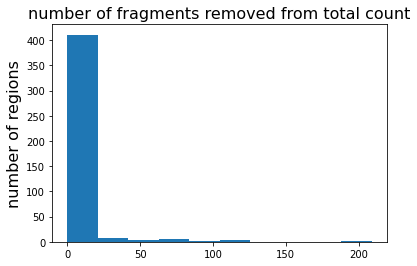

In [30]:
diffs = df_norm_tot_3cpg.iloc[0,:] - df_filt_tot_3cpg.iloc[0,:]
plt.hist(diffs)
plt.title("number of fragments removed from total count", size=16)
plt.ylabel("number of regions", size=16)


Text(0, 0.5, 'number of regions')

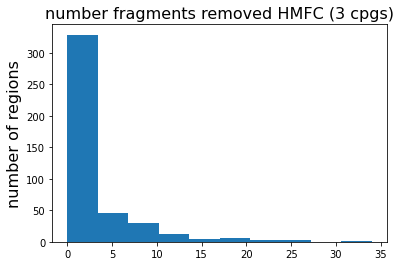

In [34]:
diffs = df_norm_meth_3cpg.iloc[0,:] - df_filt_meth_3cpg.iloc[0,:]
plt.hist(diffs)
plt.title("number fragments removed HMFC (3 cpgs)", size=16)
plt.ylabel("number of regions", size=16)

Text(0, 0.5, 'number of regions')

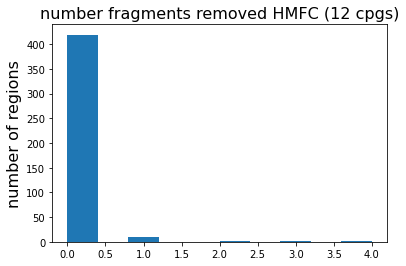

In [33]:
# 12 cpg threshold

df_norm_tot_12cpg = pd.DataFrame(mat_normal.x[0:1,:,1,1])

df_filt_tot_12cpg = pd.DataFrame(mat_filt.x[0:1,:,1,1])

df_norm_meth_12cpg = pd.DataFrame(mat_normal.x[0:1,:,1,0])

df_filt_meth_12cpg = pd.DataFrame(mat_filt.x[0:1,:,1,0])

diffs = df_norm_meth_12cpg.iloc[0,:] - df_filt_meth_12cpg.iloc[0,:]
plt.hist(diffs)
plt.title("number fragments removed HMFC (12 cpgs)", size=16)
plt.ylabel("number of regions", size=16)


Text(0, 0.5, 'number of regions')

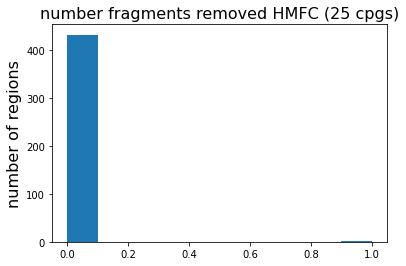

In [35]:
# 25 cpg threshold

df_norm_tot_25cpg = pd.DataFrame(mat_normal.x[0:1,:,2,1])

df_filt_tot_25cpg = pd.DataFrame(mat_filt.x[0:1,:,2,1])

df_norm_meth_25cpg = pd.DataFrame(mat_normal.x[0:1,:,2,0])

df_filt_meth_25cpg = pd.DataFrame(mat_filt.x[0:1,:,2,0])

diffs = df_norm_meth_25cpg.iloc[0,:] - df_filt_meth_25cpg.iloc[0,:]
plt.hist(diffs)
plt.title("number fragments removed HMFC (25 cpgs)", size=16)
plt.ylabel("number of regions", size=16)


## heatmaps for crc and healthy samples

In [37]:
mat_hmcfc_filt = mf.create_from_training_classes(training_classes=["colorectal_cancer_temseqV3_fuzzy_discovery1k",
                                                                   "colorectal_healthy_temseqV3_fuzzy_discovery1k"],
                                                 feature_str="hmcfc_methyl_v3_manual_regions_20200310_CpG_filtAGC/v3",
                                                 class_labels=[1,0])

mat_hmcfc_norm = mf.create_from_training_classes(training_classes=["colorectal_cancer_temseqV3_fuzzy_discovery1k",
                                                                   "colorectal_healthy_temseqV3_fuzzy_discovery1k"],
                                                 feature_str="hmcfc_methyl_v3_manual_regions_20200310/v1",
                                                 class_labels=[1,0])

print(mat_hmcfc_filt.shape)
print(mat_hmcfc_norm.shape)

(124, 61, 31, 2)
(124, 61, 31, 2)


In [43]:
df_pct_hmcfc_filt = pd.DataFrame(mat_hmcfc_filt.x[:,:,0,0]/mat_hmcfc_filt.x[:,:,0,1], index=mat_hmcfc_filt.sample_ids)

df_pct_hmcfc_norm = pd.DataFrame(mat_hmcfc_norm.x[:,:,0,0]/mat_hmcfc_norm.x[:,:,0,1], index=mat_hmcfc_norm.sample_ids)

In [47]:
stage_info_filt = [d.raw_sample_metadata["lims_top_diagnosis"]["stage"] for d in mat_hmcfc_filt.sample_metadata]
stage_info_norm = [d.raw_sample_metadata["lims_top_diagnosis"]["stage"] for d in mat_hmcfc_norm.sample_metadata]

df_pct_hmcfc_filt_minIV = df_pct_hmcfc_filt[[s != "IV" and s != "III" for s in stage_info_filt]]
print(len(df_pct_hmcfc_filt_minIV))
df_pct_hmcfc_norm_minIV = df_pct_hmcfc_norm[[s != "IV" and s != "III" for s in stage_info_norm]]
print(len(df_pct_hmcfc_norm_minIV))

117
117


Text(0.5, 69.0, 'Region (n=61)')

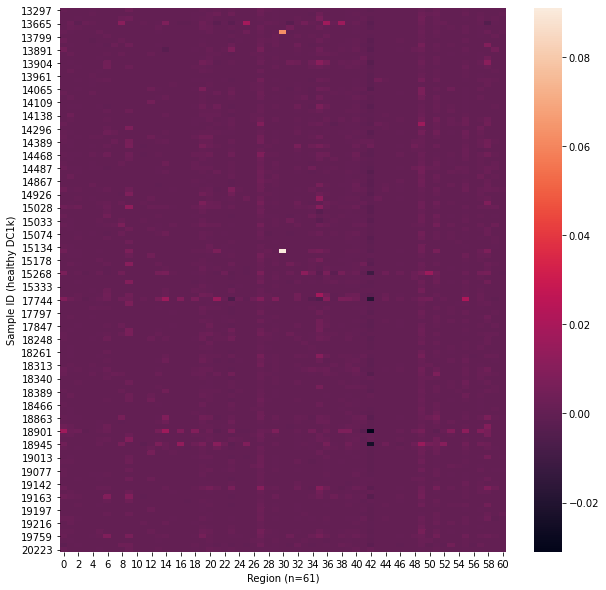

In [61]:
df_pct_hmcfc_norm = df_pct_hmcfc_norm.sort_index(axis=0)
df_pct_hmcfc_filt = df_pct_hmcfc_filt.sort_index(axis=0)
diffs = df_pct_hmcfc_norm - df_pct_hmcfc_filt

plt.figure(figsize=(10,10))
sns.heatmap(diffs)
#sns.clustermap(diffs)
plt.ylabel("Sample ID (healthy DC1k)")
plt.xlabel("Region (n=61)")


In [65]:
max(diffs.max())

0.09090909090909091

In [66]:
min(diffs.min())  # I think this goes below 0 b/c some total fragments are getting removed as well.

-0.031029352728646653